# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Изучение и подготовка  данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 12345

In [2]:
full = pd.read_csv('/datasets/gold_recovery_full.csv')
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')

Напишем функцию для получения информации о данных.

In [3]:
def info_dataset(dataset):
    print('Общая информация о столбцах регирна')
    display(dataset.info())
    print()
    print('Пропущенные значения')
    display(dataset.isna().sum().sum())
    print()
    print('Количество повторяющихся строк')
    display(dataset.duplicated().sum())
    print()
    print('Первые 10 строк датасета')
    display(dataset.head(10))
def shape_dataset(dataset):
    print(dataset.shape)

In [4]:
info_dataset(full)

Общая информация о столбцах регирна
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_c

None


Пропущенные значения


36587


Количество повторяющихся строк


0


Первые 10 строк датасета


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


Почти в каждом столбце есть пропущенные значения - примерно 1,85% от всего объема данных. Возможно это просто нулевые значения, то есть отсутствие какого-либо элемента в концентрате. Датасет содержит 86 количественных признаков и лишь один категориальный - дата. Если потребуется, заменим её формат на datetime.

In [5]:
shape_dataset(full)
shape_dataset(train)
shape_dataset(test)

(22716, 87)
(16860, 87)
(5856, 53)


Как сказано в задаче, что некоторые признаки расчитываются во время процесса и тестовые данные не содержат 34 столбца.

## Расчитаем эффективность обогащения.

Она находится по формуле: Recovery = ((C × (F-T)) / (F × (C-T))) × 100%, где C — доля золота в концентрате после флотации/очистки; F — доля золота в сырье/концентрате до флотации/очистки; T — доля золота в отвальных хвостах после флотации/очистки. Вычислим её на обучающей выборке.

Получается, будем использовать следующие столбцы для подсчета: C — rougher.output.concentrate_au, F — rougher.input.feed_au, T — rougher.output.tail_au.

In [6]:
train_temp = train.copy(deep=True)

In [7]:
C = train_temp['rougher.output.concentrate_au']
F = train_temp['rougher.input.feed_au']
T = train_temp['rougher.output.tail_au']

train_temp['rougher.output.recovery.checked'] = (C * (F - T)) / (F * (C - T)) * 100
train_temp['rougher.output.recovery.checked'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery.checked, dtype: float64

Почитаем среднюю абсолютную ошибку MAE.

In [8]:
train_temp.dropna(inplace=True)
print('MAE:',mean_absolute_error(train_temp['rougher.output.recovery'],\
                                 train_temp['rougher.output.recovery.checked']))

MAE: 9.555596961987514e-15


Ошибка очень мала, значит мы посчитали всё правильно.

Изучим признаки, которые отсутствуют в тестовой выборке, но есть в обучающей.

In [9]:
set(train.columns) - set(test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Это финальные параметры продукта, параметры продукта после первичной/вторичной очистки, различные характеристики, которые вычисляются во время флотации, а так же параметры продукта после вторичной очистки. По логике все эти параметры расчитываются непосредственно во время самого процесса.

# Предобработка данных.

Создадим копии датасетов.

In [10]:
full_copy = full.copy(deep=True)
train_copy = train.copy(deep=True)
test_copy = test.copy(deep=True)
datasets_copy = {'Исходные данные': full_copy, 
                 'Обучающая выборка': train_copy, 
                 'Тестовая выборка': test_copy}

Добавим в тестовую копию целевые признаки.

In [11]:
test_copy = test_copy.merge(full_copy[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                           how = 'left', on = 'date')
test_copy.shape

(5856, 55)

Удалим строки с пропусками из целевых признаков.

In [12]:
cols = ['rougher.output.recovery', 'final.output.recovery']

full_copy.dropna(subset=cols, inplace=True)
train_copy.dropna(subset=cols, inplace=True)
test_copy.dropna(subset=cols, inplace=True)

Заполним пропуски в остальных признаках.

In [13]:
for key, value in datasets_copy.items():
    value.ffill(inplace=True)
    print(value.isnull().values.any())

False
False
False


В обучающей выборке удалим признаки, которых нет в тестовой.

In [14]:
useful_cols = list(test_copy.columns)
train_copy = train_copy[useful_cols]

In [15]:
print('Размер выборки train_copy:', train_copy.shape)
print('Размер выборки test_copy:', test_copy.shape)

Размер выборки train_copy: (14149, 55)
Размер выборки test_copy: (5290, 55)


Количество признаков выборок совпадает. В обучающей и тестовой выборках только те признаки, которые нужны нам для обучения.

# Анализ данных

## Изучим, как меняется концентрация металлов (au, ag, pb) на различных этапах очистки.

Для этого напишем функцию для визуализации.

In [16]:
def visual_metal_conc(metal):
    cols = ['rougher.input.feed_'+metal, 'rougher.output.concentrate_'+metal, 
            'primary_cleaner.output.concentrate_'+metal, 'final.output.concentrate_'+metal]
    concentrate = full_copy[cols]
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=full_copy[cols], palette='rainbow')
    plt.title('Концентрация металла ' + metal + ' на различных этапах очистки', fontsize=16)
    plt.xlabel('Стадия')
    plt.ylabel('Концентрация')
    plt.show()

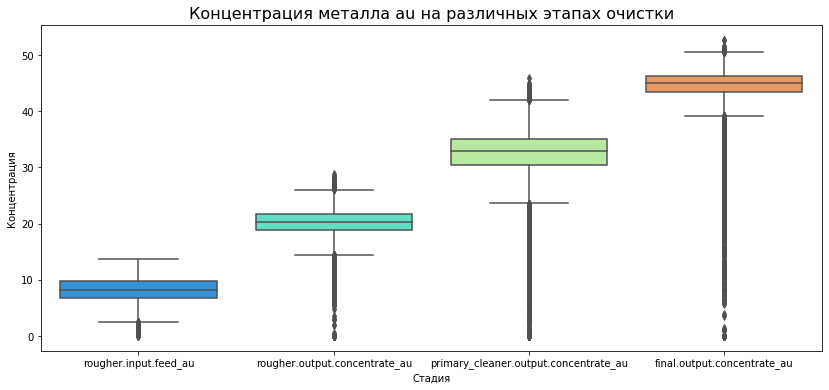

In [17]:
visual_metal_conc('au')

На каждом этапе очень много выбросов. Концентрация золота растёт с каждым этапом очистки, это логично, так как это целевой металл.

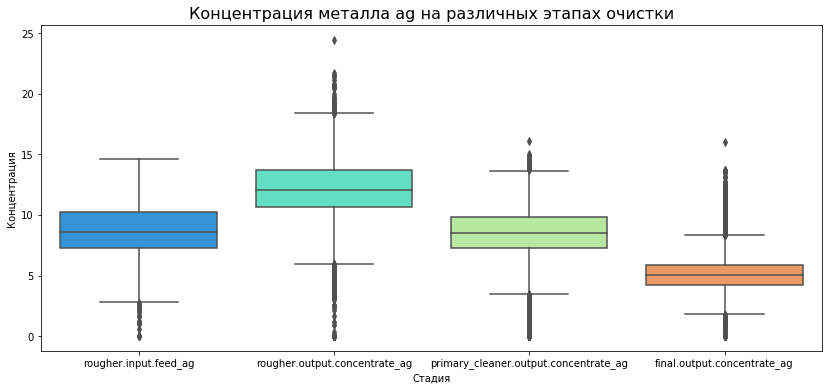

In [18]:
visual_metal_conc('ag')

Так же есть выбросы. Концентрация серебра сначала высокая, но потом постепенно снижается.

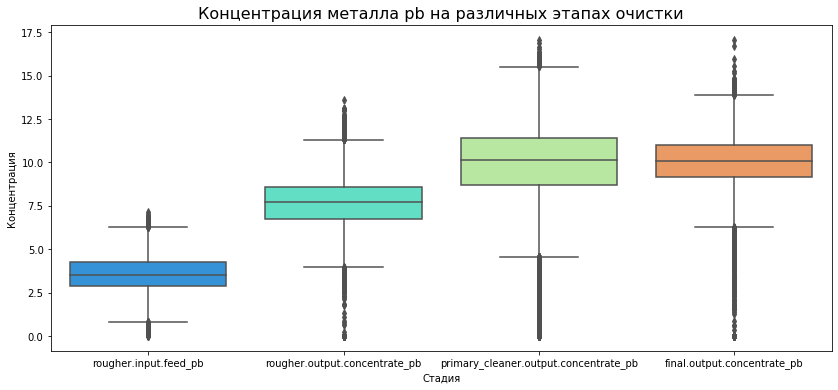

In [19]:
visual_metal_conc('pb')

Выбросы присутствуют. На первых трёх этапах концентрация свинца растёт, на четвёртом этапе медиана почти равна медиане третьего этапа, но разброс значений меньше.

## Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

Размер гранул хранится в колонках primary_cleaner.input.feed_size и rougher.input.feed_size.

In [20]:
rougher_input_feed_size = pd.concat([train_copy['rougher.input.feed_size'], 
                                     test_copy['rougher.input.feed_size']], axis=1) 
rougher_input_feed_size.columns = ['train', 'test']
rougher_input_feed_size.describe()

,train,test
count,14149.000000,5289.000000
mean,60.239856,55.951097
std,23.005310,19.081758
min,9.659576,0.046369
25%,48.966751,43.906347
50%,55.269784,50.841029
75%,66.007526,62.431047
max,484.967466,392.494040


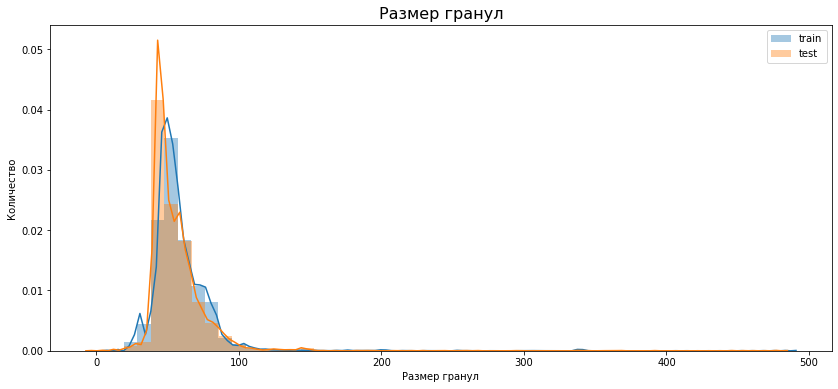

In [21]:
plt.figure(figsize=(14, 6))
sns.distplot(train['rougher.input.feed_size'].dropna(), label='train')
sns.distplot(test['rougher.input.feed_size'].dropna(), label='test')
plt.legend()
plt.title('Размер гранул', fontsize=16)
plt.xlabel('Размер гранул')
plt.ylabel('Количество')
plt.show()

Разница в тестовом наборе и обучающем есть. В обучающем наборе все статистические данные немного выше. Но в целом они различаются слабо. Возможно это связано с различием в размере наборов данных.

In [22]:
primary_cleaner_input_feed_size = pd.concat([train_copy['primary_cleaner.input.feed_size'], 
                                     test_copy['primary_cleaner.input.feed_size']], axis=1) 
primary_cleaner_input_feed_size.columns = ['train', 'test']
primary_cleaner_input_feed_size.describe()

,train,test
count,14149.000000,5290.000000
mean,7.322310,7.266339
std,0.614062,0.610219
min,1.080000,5.650000
25%,6.960000,6.890000
50%,7.290000,7.250000
75%,7.700000,7.600000
max,10.470000,15.500000


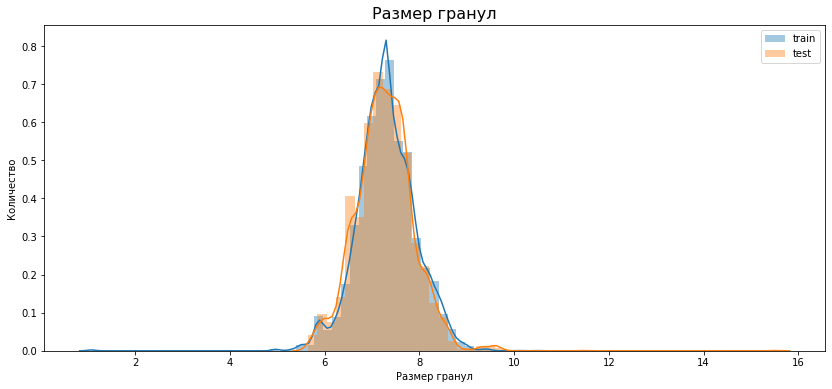

In [23]:
plt.figure(figsize=(14, 6))
sns.distplot(train['primary_cleaner.input.feed_size'].dropna(), label='train')
sns.distplot(test['primary_cleaner.input.feed_size'].dropna(), label='test')
plt.legend()
plt.title('Размер гранул', fontsize=16)
plt.xlabel('Размер гранул')
plt.ylabel('Количество')
plt.show()

Здесь тоже данные почти одинаковые. Вряд ли они сильно повлияют на работу модели.

## Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Для начаала посчитаем общую концентрацию металлов на каждом этапе.

In [24]:
full_copy['сырье'] = full_copy[['rougher.input.feed_au', 'rougher.input.feed_ag',\
                                'rougher.input.feed_pb']].sum(axis=1)
full_copy['черновой концентрат'] = full_copy[['rougher.output.concentrate_au',\
                                              'rougher.output.concentrate_ag',\
                                              'rougher.output.concentrate_pb']].sum(axis=1)
full_copy['первичная очистка'] = full_copy[['primary_cleaner.output.concentrate_au',\
                                            'primary_cleaner.output.concentrate_ag',\
                                            'primary_cleaner.output.concentrate_pb']].sum(axis=1)
full_copy['финальный концентрат'] = full_copy[['final.output.concentrate_au',\
                                               'final.output.concentrate_ag',\
                                               'final.output.concentrate_pb']].sum(axis=1)

In [25]:
full_copy[['сырье', 'черновой концентрат', 'первичная очистка', 'финальный концентрат']].describe()

,сырье,черновой концентрат,первичная очистка,финальный концентрат
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,20.646120,39.373032,50.372125,59.223721
std,4.480027,6.863389,7.628095,6.095138
min,0.030000,0.000000,0.000000,0.000000
25%,17.252879,38.394639,50.053899,59.298323
50%,20.141216,40.312648,51.909156,60.306921
75%,23.797381,42.365102,53.386898,61.096667
max,33.498784,55.568687,60.269003,64.968881


На трёх этапах из четырех есть нулевые значения. 
Построим графики.

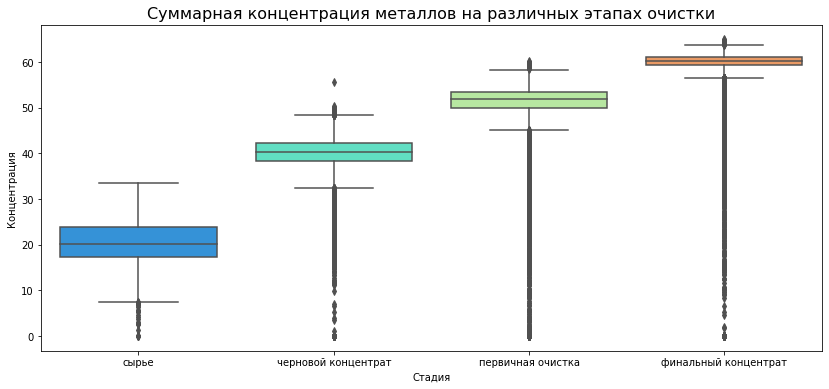

In [26]:
cols = ['сырье', 'черновой концентрат', 'первичная очистка', 'финальный концентрат']
concentrate = full_copy[cols]
plt.figure(figsize=(14, 6))
sns.boxplot(data=full_copy[cols], palette='rainbow')
plt.title('Суммарная концентрация металлов на различных этапах очистки', fontsize=16)
plt.xlabel('Стадия')
plt.ylabel('Концентрация')
plt.show()

В данных присутствуют выбросы. Что бы они не повлияли на работу модели удалим их.

In [27]:
full_clean = full_copy[
    (full_copy['сырье'] >  0.5) & 
    (full_copy['черновой концентрат'] > 0.5) & 
    (full_copy['первичная очистка'] > 0.5) & 
    (full_copy['финальный концентрат'] > 0.5)
]
full_clean.shape

(18723, 91)

In [28]:
full_clean[['сырье', 'черновой концентрат', 'первичная очистка', 'финальный концентрат']].describe()

,сырье,черновой концентрат,первичная очистка,финальный концентрат
count,18723.000000,18723.000000,18723.000000,18723.000000
mean,20.649942,40.211941,50.958765,59.537395
std,4.431152,3.823005,5.234731,4.263593
min,2.560855,1.137053,0.706329,1.685441
25%,17.237414,38.537404,50.123475,59.307605
50%,20.136186,40.380059,51.916928,60.303141
75%,23.787453,42.410854,53.362263,61.086615
max,33.498784,55.568687,60.106566,64.968881


Разброс значительно уменьшился (std). Перед обучением моделей удалим из выборок данные, которые мы удалили чуть выше, используя уникальное поле date.

In [29]:
train_clean = train_copy[train_copy['date'].isin(full_clean['date'])]
test_clean = test_copy[test_copy['date'].isin(full_clean['date'])]
train_clean.dropna(inplace=True)
test_clean.dropna(inplace=True)
print('Обучающая выборка', train_clean.shape)
print('Тестовая выборка', test_clean.shape)

Обучающая выборка (13600, 55)
Тестовая выборка (5074, 55)


# Модель <a name="4"></a>

## Напишем функцию для вычисления итоговой sMAPE. <a name="4.1"></a>

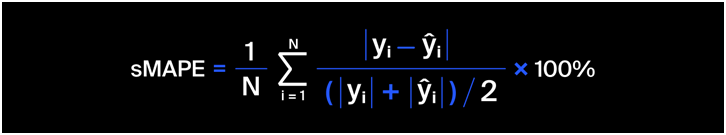 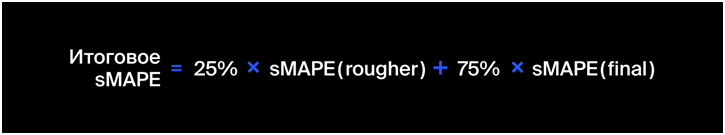

In [30]:
def smape(target, predictions):
    summa = (abs(predictions - target) / ((abs(target) + abs(predictions)) / 2)).sum()
    smape = 1 / len(target) * summa * 100
    return smape

In [31]:
def smape_final(smape_rougher, smape_final):
    smape_final = 0.25 * smape_rougher + 0.75 * smape_final
    return smape_final

## Обучение моделей <a name="4.2"></a>

Разделим данные на признаки и целевой признак.

In [32]:
target_rougher_train = train_clean['rougher.output.recovery']
target_final_train = train_clean['final.output.recovery']
features_train = train_clean.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

target_rougher_test = test_clean['rougher.output.recovery']
target_final_test = test_clean['final.output.recovery']
features_test = test_clean.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

Проведем проверку.

In [33]:
print('target_rougher_train', target_rougher_train.shape)
print('target_final_train', target_final_train.shape)
print('features_train', features_train.shape)
print('target_rougher_test', target_rougher_test.shape)
print('target_final_test', target_final_test.shape)
print('features_test', features_test.shape)

target_rougher_train (13600,)
target_final_train (13600,)
features_train (13600, 52)
target_rougher_test (5074,)
target_final_test (5074,)
features_test (5074, 52)


Масштабируем признаки.

In [34]:
numeric = features_train.columns
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [35]:
features_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-0.177006,0.374727,-0.12841,0.283276,-0.446623,-0.299188,-0.428710,-0.810469,-0.433448,-0.276239,...,-1.050950,-0.476193,-0.642404,-0.759964,-1.178832,-0.384055,-0.864248,-0.430515,-0.960772,-2.679974
1,-0.214751,0.424821,-0.12841,0.320290,-0.241348,-0.355807,-0.241935,-0.321579,-0.239037,-0.295000,...,-1.055287,-0.535543,-0.670769,-0.702090,-1.159313,-0.432735,-0.880711,-0.433357,-0.987503,-2.516272
2,-0.261441,0.729047,-0.12841,0.289948,-0.043863,-0.330033,-0.055771,-0.343510,-0.045451,-0.339985,...,-1.051272,-0.476841,-0.677936,-0.698701,-1.153873,-0.431666,-0.875660,-0.431706,-0.982207,-2.560617
3,-0.301427,0.730795,-0.12841,0.304518,-0.056210,-0.357137,-0.053695,-0.315998,-0.058100,-0.335875,...,-1.047475,-0.444096,-0.661462,-0.699733,-1.171147,-0.407389,-0.882000,-0.425018,-0.986245,-2.521922
4,-0.411920,0.907204,-0.12841,0.339473,-0.045547,-0.300987,-0.047763,-0.335099,-0.063475,-0.340508,...,-1.049102,-0.424045,-0.670287,-0.697342,-1.178819,-0.472437,-0.896412,-0.427578,-0.987801,-2.562492


Используем кросс-валидацию.

In [36]:
models = [DecisionTreeRegressor(random_state=RANDOM_STATE), 
          RandomForestRegressor(random_state=RANDOM_STATE), 
          LinearRegression()]

In [37]:
results_cross_val = []
CV = 5

for model in models: 
    
    scorer = make_scorer(smape, greater_is_better=False) 
    
    cross_val_score_rougher = cross_val_score(model, 
                                              features_train, 
                                              target_rougher_train, 
                                              cv=CV, scoring=scorer).mean()
    cross_val_score_final = cross_val_score(model, 
                                            features_train, 
                                            target_final_train, 
                                            cv=CV, scoring=scorer).mean()

    results_cross_val.append({'model name': model.__class__.__name__, 
                              'cross_val_score_rougher': cross_val_score_rougher, 
                              'cross_val_score_final': cross_val_score_final}) 
              
pd.DataFrame(results_cross_val)

,model name,cross_val_score_rougher,cross_val_score_final
0,DecisionTreeRegressor,-8.907935,-16.353157
1,RandomForestRegressor,-6.828489,-10.359698
2,LinearRegression,-7.282889,-11.027247


In [38]:
%%time 
results = []

for depth in range(1,6):
    
    for estimator in range(10, 81, 10):
        
        model = RandomForestRegressor(random_state=RANDOM_STATE, 
                                       n_estimators=estimator, 
                                       max_depth=depth)
        
        scorer = make_scorer(smape, greater_is_better=False) 
    
        cross_val_score_rougher = cross_val_score(model, features_train, target_rougher_train, cv=CV, scoring=scorer).mean()
        cross_val_score_final = cross_val_score(model, features_train, target_final_train, cv=CV, scoring=scorer).mean()

        smape_final_result = smape_final(cross_val_score_rougher, cross_val_score_final)

        results.append({'model name': model.__class__.__name__, 
                        'Hyperparameters': {'random_state': RANDOM_STATE, 
                                            'n_estimators': estimator, 
                                            'max_depth':depth}, 
                        'smape_final_result': smape_final_result})

pd.DataFrame(results).style.highlight_max(color = 'lightgreen', axis = 0)

CPU times: user 40min 4s, sys: 1.38 s, total: 40min 5s
Wall time: 40min 38s


,model name,Hyperparameters,smape_final_result
0,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 10, 'max_depth': 1}",-8.98955
1,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 20, 'max_depth': 1}",-8.99733
2,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 30, 'max_depth': 1}",-9.01101
3,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 40, 'max_depth': 1}",-9.02908
4,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 50, 'max_depth': 1}",-9.02787
5,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 60, 'max_depth': 1}",-9.0292
6,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 70, 'max_depth': 1}",-9.02188
7,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 80, 'max_depth': 1}",-9.01853
8,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 10, 'max_depth': 2}",-8.63246
9,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 20, 'max_depth': 2}",-8.5806


# Проверка модели

Проверим модель на тестовой выборке с гиперпараметрами n_estimators=80, max_depth=5.

In [40]:
%%time
model_final = RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=80, max_depth=5)

model_final.fit(features_train, target_rougher_train)
predictions_r = model_final.predict(features_test)

model_final.fit(features_train, target_final_train)
predictions_f = model_final.predict(features_test)

CPU times: user 52.5 s, sys: 12 ms, total: 52.6 s
Wall time: 52.8 s


In [41]:
smape_r = smape(target_rougher_test, predictions_r)
smape_f = smape(target_final_test, predictions_f)

print('Итоговое sMAPE:', smape_final(smape_r, smape_f))

Итоговое sMAPE: 7.234663072335244


Проверка модели на адекватность с помощью DummyRegressor.

In [42]:
dummy_regr = DummyRegressor(strategy='mean')

dummy_regr.fit(features_train, target_rougher_train)
predictions_r_dummy = dummy_regr.predict(features_test)
dummy_regr.fit(features_train, target_final_train)
predictions_f_dummy = dummy_regr.predict(features_test)

In [43]:
smape_r_dummy = smape(target_rougher_test, predictions_r_dummy)
smape_f_dummy = smape(target_final_test, predictions_f_dummy)

print('Итоговое sMAPE', smape_final(smape_r_dummy, smape_f_dummy))

Итоговое sMAPE 7.683769011978074


В итоге наша модель работает лучше простейшей модели, так как итоговое sMAPE на нашей модели ниже.